# Задание 6 вариант 1

In [58]:
import numpy as np
import pandas as pd
import random
import time
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

%matplotlib inline


Загрузка датасета и информация о нем

In [59]:
df = pd.read_csv("dataset_task6.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [60]:
df.shape

(3333, 21)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Все строки заполнены

## Поиск выбросов

<AxesSubplot:>

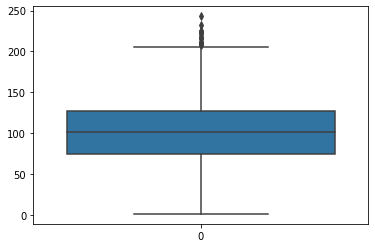

In [62]:
sns.boxplot(data=df['account length'])

<AxesSubplot:>

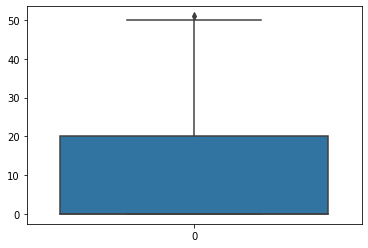

In [63]:
sns.boxplot(data=df['number vmail messages'])

Посмотрим поближе

In [64]:
df.loc[df['number vmail messages'] >= 50]


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
845,FL,144,415,376-4484,no,yes,51,283.9,98,48.26,...,109,16.32,196.3,85,8.83,10.0,4,2.70,1,False
2716,WV,137,510,376-4284,no,yes,50,186.5,94,31.71,...,106,15.13,215.6,100,9.70,12.1,4,3.27,2,False
2887,OR,134,415,359-7255,no,yes,50,208.8,130,35.50,...,104,11.30,136.7,107,6.15,11.1,4,3.00,2,False


Не является выбросом

<AxesSubplot:>

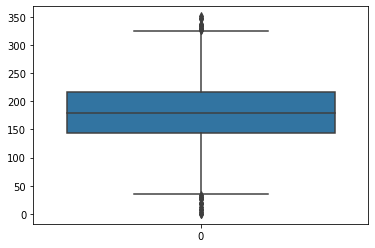

In [65]:
sns.boxplot(data=df['total day minutes'])

<AxesSubplot:>

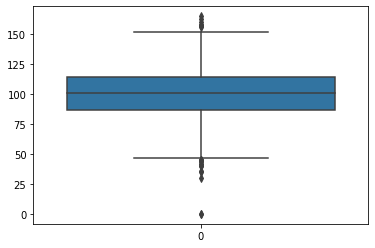

In [66]:
sns.boxplot(data=df['total day calls'])

In [67]:
df.loc[df['total day calls']<25]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.0,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.0,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False


Не является выбросом

<AxesSubplot:>

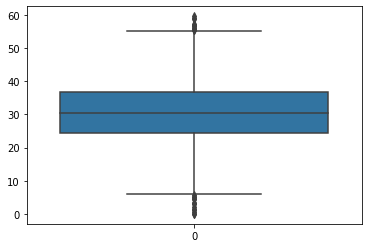

In [68]:
sns.boxplot(data=df['total day charge'])

<AxesSubplot:>

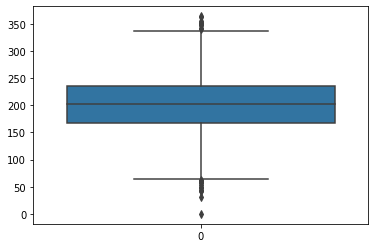

In [69]:
sns.boxplot(data=df['total eve minutes'])

In [70]:
df.loc[df['total eve minutes'] < 25]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
2932,UT,97,415,418-3181,no,no,0,209.2,134,35.56,...,0,0.0,175.4,94,7.89,11.8,6,3.19,1,False


Похоже на выброс, т.к. остальные колонки с eve не заполнены, удалим его

In [71]:
# df = df.drop(labels=[2932], axis=0)

Проверим

In [72]:
df.loc[df['total eve minutes'] < 25]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
2932,UT,97,415,418-3181,no,no,0,209.2,134,35.56,...,0,0.0,175.4,94,7.89,11.8,6,3.19,1,False


<AxesSubplot:>

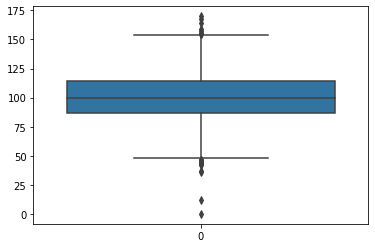

In [73]:
sns.boxplot(data=df['total eve calls'])

In [74]:
df.loc[df['total eve calls'] < 25]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
960,AR,5,415,380-2758,no,no,0,199.2,106,33.86,...,12,15.92,214.0,85,9.63,13.3,3,3.59,3,False
2932,UT,97,415,418-3181,no,no,0,209.2,134,35.56,...,0,0.00,175.4,94,7.89,11.8,6,3.19,1,False


Не выброс

<AxesSubplot:>

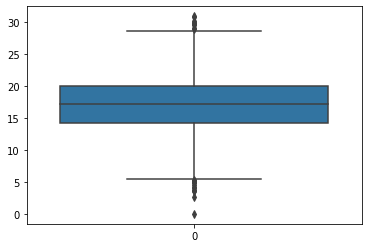

In [75]:
sns.boxplot(data=df['total eve charge'])

<AxesSubplot:>

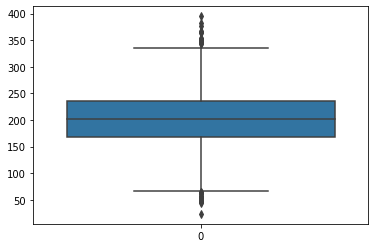

In [76]:
sns.boxplot(data=df['total night minutes'])


In [77]:
df.loc[df['total night minutes'] <25]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1260,AK,76,415,366-9781,no,yes,22,160.1,107,27.22,...,136,14.34,23.2,102,1.04,9.5,4,2.57,3,False


Не выброс

<AxesSubplot:>

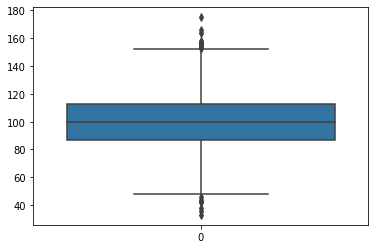

In [78]:
sns.boxplot(data=df['total night calls'])

In [79]:
df.loc[df['total night calls'] > 170]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
493,RI,129,415,366-7360,no,yes,33,119.6,104,20.33,...,88,23.69,263.4,175,11.85,5.9,2,1.59,2,False


Не выброс

<AxesSubplot:>

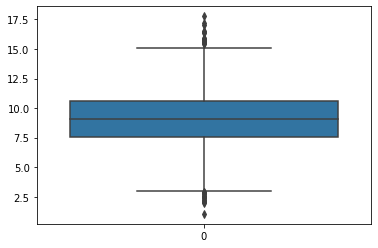

In [80]:
sns.boxplot(data=df['total night charge'])

In [81]:
df.loc[df['total night charge'] < 2]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1113,IA,152,415,387-6716,no,no,0,206.3,98,35.07,...,82,24.89,43.7,121,1.97,10.6,4,2.86,1,False
1260,AK,76,415,366-9781,no,yes,22,160.1,107,27.22,...,136,14.34,23.2,102,1.04,9.5,4,2.57,3,False


<AxesSubplot:>

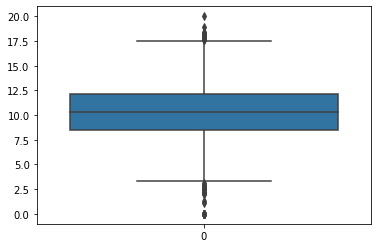

In [82]:
sns.boxplot(data=df['total intl minutes'])

In [83]:
df.loc[df['total intl minutes'] > 19]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
115,ME,36,510,363-1069,yes,yes,42,196.8,89,33.46,...,122,21.67,138.3,126,6.22,20.0,6,5.4,0,True


<AxesSubplot:>

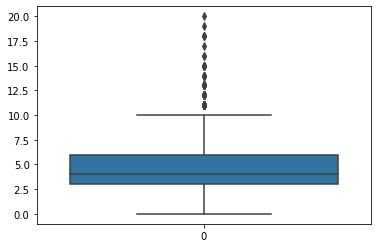

In [84]:
sns.boxplot(data=df['total intl calls'])

<AxesSubplot:>

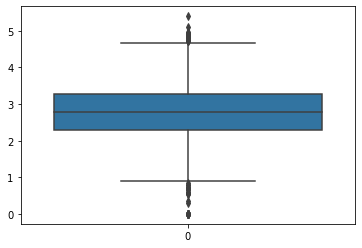

In [85]:
sns.boxplot(data=df['total intl charge'])

In [86]:
df.loc[df['total intl charge'] > 5]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
115,ME,36,510,363-1069,yes,yes,42,196.8,89,33.46,...,122,21.67,138.3,126,6.22,20.0,6,5.4,0,True
314,ID,128,408,359-5890,no,no,0,125.2,99,21.28,...,107,17.46,254.4,111,11.45,18.9,2,5.1,0,False


<AxesSubplot:>

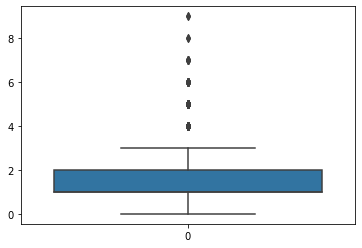

In [87]:
sns.boxplot(data=df['customer service calls'])


## Замена данных на числовые

In [88]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


Закодируем все object

In [89]:
from sklearn.preprocessing import LabelEncoder

cols = ['state', 'international plan', 'voice mail plan', 'churn']
le = LabelEncoder()
for i in cols:
    df[i] = le.fit_transform(df[i])

df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


Удалим телефонный номер, т.к. он является своего рода ID объекта

In [90]:
df = df.drop('phone number', axis=1)

In [91]:
df.head(3)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


## Анализ данных

### Количество данных

In [92]:
df.shape

(3333, 20)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int32  
 4   voice mail plan         3333 non-null   int32  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

### Распределение данных по целевому признаку

<AxesSubplot:xlabel='churn', ylabel='count'>

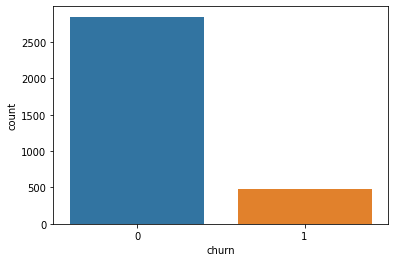

In [94]:
sns.countplot(x='churn', data=df)

### Зависимость данных

<AxesSubplot:>

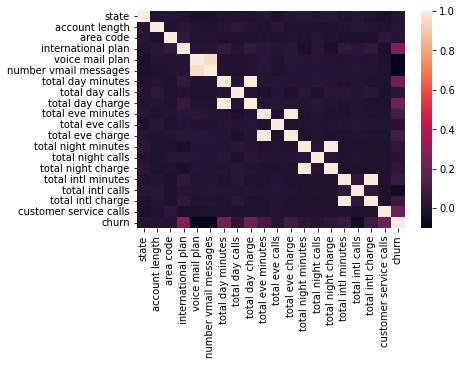

In [95]:
corMx = df.corr()
sns.heatmap(corMx)

## Функция для подсчета величины энтропии для выборки

In [96]:
# вычисление энтропии
def entropy(data):
    # подсчитываем элементы, принадлежащие каждому классу
    _, number_of_class = np.unique(data[:, -1], return_counts=True)
    # вычисляем вероятность каждого класса = (его представители / все представители)
    Pi = number_of_class / number_of_class.sum()
    return sum(Pi * -np.log2(Pi))

# вычисление общей энтропии для левого и правого потомков
def calculateOverallEntropy(dataBelow, dataAbove):
    # вычисление энтропии снизу
    pDataBelow = len(dataBelow) / (len(dataBelow) + len(dataAbove))
    # вычисление энтропии сверху
    pDataAbove = len(dataAbove) / (len(dataBelow) + len(dataAbove))
    # возвращает общую энтропию
    return pDataBelow * entropy(dataBelow) + pDataAbove * entropy(dataAbove)

## Реализация своего дерева решений

In [97]:
import numpy as np
import pandas as pd
import random

# разделение выборки на трейн и тест
def trainTestSplit(dataFrame, testSize):
    # если testSize - флоат
    if isinstance(testSize, float):
        # получаем целое количество строк, которое будет принадлежать тестовой выборке
        testSize = round(testSize * len(dataFrame))
    # получаем лист с индексами датафрейма
    indices = dataFrame.index.tolist()
    # выбираем рандомные индексы для тестовой выборки
    testIndices = random.sample(population = indices, k = testSize)
    # в тестовую выборку забираем строки с полученными индексами
    dataFrameTest = dataFrame.loc[testIndices]
    # обучающая выборка - все остальное
    dataFrameTrain = dataFrame.drop(testIndices)
    # возвращаем обе выборки
    return dataFrameTrain, dataFrameTest

# функция поиска самого популярного класса
def classifyData(data):
    # получаем уникальные классы и количество их представителей
    uniqueClasses, uniqueClassesCounts = np.unique(data[:, -1], return_counts = True)
    # возвращает класс с наибольшим количеством представителей - самый популярный класс
    return uniqueClasses[uniqueClassesCounts.argmax()]

# получение потенциального разделения
def getPotentialSplits(data, randomAttributes):
    # объявление пустой переменной
    potentialSplits = {}
    # получаем количество столбцов
    _, columns = data.shape
    # получаем индексы столбцов
    columnsIndices = list(range(columns - 1))
    # если есть рандомное разбиение
    if randomAttributes != None and len(randomAttributes) <= len(columnsIndices):   
        # говорим, что индексы колонок и есть это рандомное разбиение
        columnsIndices = randomAttributes
    # для каждого столбца
    for column in columnsIndices:
        # забираем столбец
        values = data[:, column]
        # получаем классы данного признака
        uniqueValues = np.unique(values)
        # если есть только один класс
        if len(uniqueValues) == 1:
            # записываем это значение как класс, по которому будем делить данный признак
            potentialSplits[column] = uniqueValues
        else:
            # иначе ничего для этого столбца не записываем
            potentialSplits[column] = []
            # для каждого индекса среди классов
            for i in range(len(uniqueValues)):
                # чтобы взять предыдущий элемент
                if i != 0:
                    currentValue = uniqueValues[i]
                    previousValue = uniqueValues[i - 1]
                    # классом, по которому будем делить данный признак, будет случайный признак
                    potentialSplits[column].append((currentValue + previousValue) / 2)
    return potentialSplits

# функция разделения даты по столбцу и по его значению
def splitData(data, splitColumn, splitValue):
    # получаем все значения признака, по которому будем делить
    splitColumnValues = data[:, splitColumn]
    # возвращаем два сета - левый, где значения меньше или равны порога, правый - все остальные
    return data[splitColumnValues <= splitValue], data[splitColumnValues > splitValue]

# поиск лучшего разделения
def determineBestSplit(data, potentialSplits, randomSplits = None):
    # т.к. нужна наименьшая энтропия, но изначально указываем ее максимальную
    overallEntropy = 9999
    # задаем переменную, содержащую столбец с номером лучшего признака для разделения 
    bestSplitColumn = 0
    # задаем переменную, содержащую значение, по которому будет производиться разделение
    bestSplitValue = 0
    # если делим нерандомно
    if randomSplits == None:
        # для столбцов, по которым потенциально может пройти разделение
        for splitColumn in potentialSplits:
            # для значений этих столбцов
            for splitValue in potentialSplits[splitColumn]:
                # вычисляем временное разделение
                dataBelow, dataAbove = splitData(data, splitColumn, splitValue)
                # считаем энтропию такого разделения
                currentOverallEntropy = calculateOverallEntropy(dataBelow, dataAbove)
                # если энтропия получилась лучше (ее значение меньше), то запоминаем данное разделение
                if currentOverallEntropy <= overallEntropy:
                    overallEntropy = currentOverallEntropy
                    bestSplitColumn = splitColumn
                    bestSplitValue = splitValue
    # если же разделение рандомное
    else:
        # для значений рандомного разделения
        for i in range(randomSplits):
            # выбираем рандомный признак для разделения
            randomSplitColumn = random.choice(list(potentialSplits))
            # выбираем рандомное пороговое значение для разделения
            randomSplitValue = random.choice(potentialSplits[randomSplitColumn])
            # делим дату в соответствии с выбранными значениями для разделения
            dataBelow, dataAbove = splitData(data, randomSplitColumn, randomSplitValue)
            # считаем энтропию
            currentOverallEntropy = calculateOverallEntropy(dataBelow, dataAbove)
            # проверяем, получился ли лучший результат, чем был найден до этого
            if currentOverallEntropy <= overallEntropy:
                overallEntropy = currentOverallEntropy
                bestSplitColumn = randomSplitColumn
                bestSplitValue = randomSplitValue
    # возвращает лучший признак и его лучшее значение для разделения
    return bestSplitColumn, bestSplitValue

# функция построения дерева решений
def buildDecisionTree(dataFrame, currentDepth = 0, minSampleSize = 2, maxDepth = 1000, randomAttributes = None, randomSplits = None):
    # если находимся в начале построения дерева, когда еще не было ни одного разделения
    if currentDepth == 0:
        # представляем датасет как numpy массив
        data = dataFrame.values
        # если были поданы рандомные атрибуты и если их длина меньше, чем количество признаков
        if randomAttributes != None and randomAttributes <= len(dataFrame.columns) - 1:
            # случайным образом выбираем атрибуты среди признаков датасета
            randomAttributes = random.sample(population = list(range(len(dataFrame.columns) - 1)), k = randomAttributes)
        # иначе ничего с рандомными атрибутами не делаем
        else:
            randomAttributes = None
    # иначе если дерево уже в процессе построения
    else:
        # объявляем датой поданый датафрейм
        data = dataFrame
    # если количество строк = 1 или длина оставшихся строк меньше семпл сайз, или достигли максимальной глубины
    # т.е. если достигли точки останова
    if (len(np.unique(data[:, -1])) == 1) or len(data) < minSampleSize or currentDepth == maxDepth:
        # получаем популярный класс
        return classifyData(data)
    # иначе продолжаем построение
    else:
        # увеличиваем глубину
        currentDepth += 1
        # получаем потенциальное разбиение
        potentialSplits = getPotentialSplits(data, randomAttributes)
        # среди потенциального разбиения ищем лучшего кандидата
        splitColumn, splitValue = determineBestSplit(data, potentialSplits, randomSplits)
        # в соответствии с лучшим разбиением делим дату
        dataBelow, dataAbove = splitData(data, splitColumn, splitValue)
        # если в одной из веток ничего не оказалось, получаем популярный класс
        if len(dataBelow) == 0 or len(dataAbove) == 0:
            return classifyData(data)
        # иначе и в левой, и в правой ветке есть данные
        else:
            # формируем строку вопроса - "<имя признака> <= <значения для разделения>"
            question = str(dataFrame.columns[splitColumn]) + " <= " + str(splitValue)
            # формируем поддерево
            decisionSubTree = {question: []}
            # ответа да - рекурсивное построение левого потомка
            yesAnswer = buildDecisionTree(dataBelow, currentDepth, minSampleSize, maxDepth, randomAttributes, randomSplits)
            # ответ нет - рекурсивное построение правого потомка
            noAnswer = buildDecisionTree(dataAbove, currentDepth, minSampleSize, maxDepth, randomAttributes, randomSplits)
            # если слева и справа равные ветки, то возвращаем левую
            if yesAnswer == noAnswer:
                decisionSubTree = yesAnswer
            # иначе добавляем к дереву обе ветки
            else:
                decisionSubTree[question].append(yesAnswer)
                decisionSubTree[question].append(noAnswer)
            # возвращаем построенное поддерево
            return decisionSubTree

# функция спуска по дереву до нужного класса
def classifySample(sample, decisionTree):
    # если decisionTree больше не является деревом - остановка рекурсии, дошли до листа
    if not isinstance(decisionTree, dict):
        return decisionTree
    # проверяем первый поданый признак
    question = list(decisionTree.keys())[0]
    # делим дату так же, как делилось дерево - слева меньше
    attribute, value = question.split(" <= ")
    # если значение поданного атрибута лежит в левой ветке, то в качестве ответа выбираем левую ветку
    if sample[attribute] <= float(value):
        answer = decisionTree[question][0]
    # иначе выбираем правую
    else:
        answer = decisionTree[question][1]
    # продолжаем рекурсивный спуск
    return classifySample(sample, answer)

# функция предсказания для целого датафрейма
def decisionTreePredictions(dataFrame, decisionTree):
    # предсказание - это применение функции classifySample к каждому столбцу dataFrame
    predictions = dataFrame.apply(classifySample, axis = 1, args = (decisionTree,))
    # возвращает предсказанное значение
    return predictions

# подсчет accuracy, в принципе не нужна
def calculateAccuracy(predictedResults, category):
    resultCorrect = predictedResults == category
    return resultCorrect.mean()


## Построение реализованного дерева для данных

Поиск оптимальной глубины

In [98]:
df.to_csv("df.csv", index=False)

dataFrame = pd.read_csv("df.csv")

dataFrame = dataFrame[dataFrame.columns.tolist()[1:] +
                      dataFrame.columns.tolist()[0: 1]]
dataFrameTrain, dataFrameTest = trainTestSplit(dataFrame, testSize=0.25)

i = 1
accuracyTrain = 0
while i < 10:
    startTime = time.time()
    decisionTree = buildDecisionTree(dataFrameTrain, maxDepth=i)
    buildingTime = time.time() - startTime
    decisionTreeTestResults = decisionTreePredictions(
        dataFrameTest, decisionTree)
    accuracyTest = calculateAccuracy(
        decisionTreeTestResults, dataFrameTest.iloc[:, -1]) * 100
    decisionTreeTrainResults = decisionTreePredictions(
        dataFrameTrain, decisionTree)
    accuracyTrain = calculateAccuracy(
        decisionTreeTrainResults, dataFrameTrain.iloc[:, -1]) * 100
    print("maxDepth = {}: ".format(i), end="")
    print("accTest = {0:.2f}%, ".format(accuracyTest), end="")
    print("accTrain = {0:.2f}%, ".format(accuracyTrain), end="")
    print("buildTime = {0:.2f}s".format(buildingTime), end="\n")
    i += 1


maxDepth = 1: accTest = 2.64%, accTrain = 3.52%, buildTime = 4.86s
maxDepth = 2: accTest = 3.12%, accTrain = 3.96%, buildTime = 10.25s
maxDepth = 3: accTest = 2.52%, accTrain = 4.32%, buildTime = 13.04s
maxDepth = 4: accTest = 2.52%, accTrain = 4.96%, buildTime = 16.98s
maxDepth = 5: accTest = 3.12%, accTrain = 6.72%, buildTime = 21.08s
maxDepth = 6: accTest = 3.00%, accTrain = 9.28%, buildTime = 25.99s
maxDepth = 7: accTest = 3.00%, accTrain = 13.64%, buildTime = 29.45s
maxDepth = 8: accTest = 1.92%, accTrain = 20.56%, buildTime = 33.12s
maxDepth = 9: accTest = 1.92%, accTrain = 29.80%, buildTime = 37.11s


Строим дерево на обучающей выборке с максимальной глубиной = 7

In [99]:
m_depth = 7

In [100]:
startTime = time.time()
decisionTree = buildDecisionTree(dataFrameTrain, maxDepth=7)
buildingTime = time.time() - startTime
decisionTreeTestResults = decisionTreePredictions(
    dataFrameTest, decisionTree)
accuracyTest = calculateAccuracy(
    decisionTreeTestResults, dataFrameTest.iloc[:, -1]) * 100
decisionTreeTrainResults = decisionTreePredictions(
    dataFrameTrain, decisionTree)
accuracyTrain = calculateAccuracy(
    decisionTreeTrainResults, dataFrameTrain.iloc[:, -1]) * 100
print("maxDepth = {}: ".format(7), end="")
print("accTest = {0:.2f}%, ".format(accuracyTest), end="")
print("accTrain = {0:.2f}%, ".format(accuracyTrain), end="")
print("buildTime = {0:.2f}s".format(buildingTime), end="\n")


maxDepth = 7: accTest = 3.00%, accTrain = 13.64%, buildTime = 32.26s


Посчитаем f1-меру

In [101]:
print("TRAIN:")
TP = (decisionTreeTrainResults == (dataFrameTrain.iloc[:, -1] == True)).sum()
TN = (decisionTreeTrainResults == (dataFrameTrain.iloc[:, -1] == False)).sum()
FN = (decisionTreeTrainResults != (dataFrameTrain.iloc[:, -1] == True)).sum()
FP = (decisionTreeTrainResults != (dataFrameTrain.iloc[:, -1] == False)).sum()
print("TP =", TP, "TN =", TN, "FN =", FN, "FP =", FP)
precision = TP / (TP + FP)
print("precision =", precision)
recall = TP / (TP + FN)
print("recall = ", recall)
f1 = 2 * precision * recall / (precision + recall)
print("f1 score =", f1)

print("TEST:")
TP = (decisionTreeTestResults == (dataFrameTest.iloc[:, -1] == True)).sum()
TN = (decisionTreeTestResults == (dataFrameTest.iloc[:, -1] == False)).sum()
FN = (decisionTreeTestResults != (dataFrameTest.iloc[:, -1] == True)).sum()
FP = (decisionTreeTestResults != (dataFrameTest.iloc[:, -1] == False)).sum()
print("TP =", TP, "TN =", TN, "FN =", FN, "FP =", FP)
precision = TP / (TP + FP)
print("precision =", precision)
recall = TP / (TP + FN)
print("recall = ", recall)
f1 = 2 * precision * recall / (precision + recall)
print("f1 score =", f1)


TRAIN:
TP = 61 TN = 38 FN = 2439 FP = 2462
precision = 0.024177566389219182
recall =  0.0244
f1 score = 0.024288273939876565
TEST:
TP = 17 TN = 17 FN = 816 FP = 816
precision = 0.02040816326530612
recall =  0.02040816326530612
f1 score = 0.02040816326530612


## Классификатор DecisionTreeClassifier из sklearn.tree

In [105]:
y = df['churn']
X = df.drop('churn', axis=1)

In [106]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

start = time.time()
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=m_depth)
dtc.fit(X_train, y_train)
finish = time.time()
print("Время работы классификатора: ", finish-start)
start = time.time()
y_pred = dtc.predict(X_test)
finish = time.time()
print("Время работы предсказания: ", finish-start)
print("f1-мера", f1_score(y_test, y_pred))
# print("Репорт:\n")
# classification_report(y_test, y_pred)


Время работы классификатора:  0.054999589920043945
Время работы предсказания:  0.005994081497192383
f1-мера 0.7421875


## Классификатор RandomForest из sklearn

In [108]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

start = time.time()
rfc = RandomForestClassifier(criterion='entropy', max_depth=m_depth)
rfc.fit(X_train, y_train)
finish = time.time()
print("Время работы классификатора: ", finish-start)
start = time.time()
y_pred = rfc.predict(X_test)
finish = time.time()
print("Время работы предсказания: ", finish-start)
print("f1-мера", f1_score(y_test, y_pred))


Время работы классификатора:  0.7539911270141602
Время работы предсказания:  0.03301048278808594
f1-мера 0.7168141592920354


## Сравнить качество работы классификаторов

Лучший результат показал DecisionTreeClassifier из sklearn.tree, затем идет RandomForestClassifier, собственный классификатор результат почти не показал